In [3]:
# Import dependencies
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
# Read data
red_zone_qb_proximity = pd.read_csv('https://storage.googleapis.com/big-data-bowl/redZoneQBProximity.csv')

week1 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week1.csv')
week2 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week2.csv')
week3 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week3.csv')
week4 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week4.csv')
week5 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week5.csv')
week6 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week6.csv')
week7 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week7.csv')
week8 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week8.csv')

tracking = week1.append([
    week2,
    week3,
    week4,
    week5,
    week6,
    week7,
    week8,
])

In [16]:
tracking

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978944,2021110100,4433,NaN,54,2021-11-02T03:20:26.500,NaN,football,right,24.17,27.89,2.47,2.28,0.25,NaN,NaN,None
978945,2021110100,4433,NaN,55,2021-11-02T03:20:26.600,NaN,football,right,24.36,28.03,2.36,2.16,0.24,NaN,NaN,None
978946,2021110100,4433,NaN,56,2021-11-02T03:20:26.700,NaN,football,right,24.55,28.17,2.25,1.45,0.23,NaN,NaN,None
978947,2021110100,4433,NaN,57,2021-11-02T03:20:26.800,NaN,football,right,24.73,28.31,2.28,0.72,0.23,NaN,NaN,None


In [22]:
player_teams = tracking[['nflId', 'team']].groupby(['nflId', 'team']).first().reset_index()

In [23]:
red_zone_qb_proximity_team = red_zone_qb_proximity.merge(
    player_teams,
    left_on=['nflId2'],
    right_on=['nflId']
)
red_zone_qb_proximity_team

,gameId,playId,frameId,nflId_x,officialPosition,nflId2,officialPosition2,matchupOpposing,distance,angle,nflId_y,team
0,2021090900,410,1,25511.0,QB,35481.0,TE,0,6.035006,139.367813,35481.0,TB
1,2021090900,410,2,25511.0,QB,35481.0,TE,0,5.992704,139.398705,35481.0,TB
2,2021090900,410,3,25511.0,QB,35481.0,TE,0,6.013319,139.316028,35481.0,TB
3,2021090900,410,4,25511.0,QB,35481.0,TE,0,6.012271,139.181638,35481.0,TB
4,2021090900,410,5,25511.0,QB,35481.0,TE,0,6.010275,138.912721,35481.0,TB
...,...,...,...,...,...,...,...,...,...,...,...,...
908441,2021103112,1298,36,45536.0,QB,52633.0,DE,1,2.839384,312.002211,52633.0,MIN
908442,2021103112,1298,37,45536.0,QB,52633.0,DE,1,2.764489,307.947694,52633.0,MIN
908443,2021103112,1298,38,45536.0,QB,52633.0,DE,1,2.731904,303.806404,52633.0,MIN
908444,2021103112,1298,39,45536.0,QB,52633.0,DE,1,2.720680,298.543231,52633.0,MIN


In [24]:
max_pressure = red_zone_qb_proximity_team[red_zone_qb_proximity_team['matchupOpposing'] == 1][['playId', 'distance', 'team']].groupby('playId').min().reset_index()

In [35]:
def generate_plot(team):
    max_pressure[max_pressure['team'] == team]['distance'].plot.density(figsize=(10,4),
                              xlim=(5,0))
    plt.xlabel('Distance from QB')
    plt.ylabel('Frequency')
    plt.title(f'Max Pressure by Play - {team}')

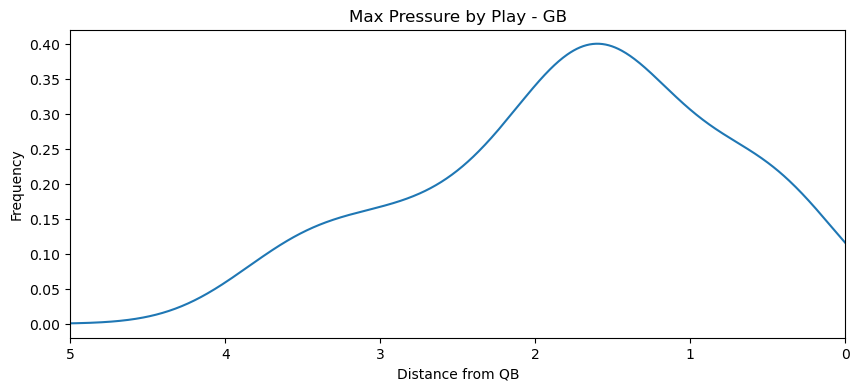

In [36]:
generate_plot('GB')

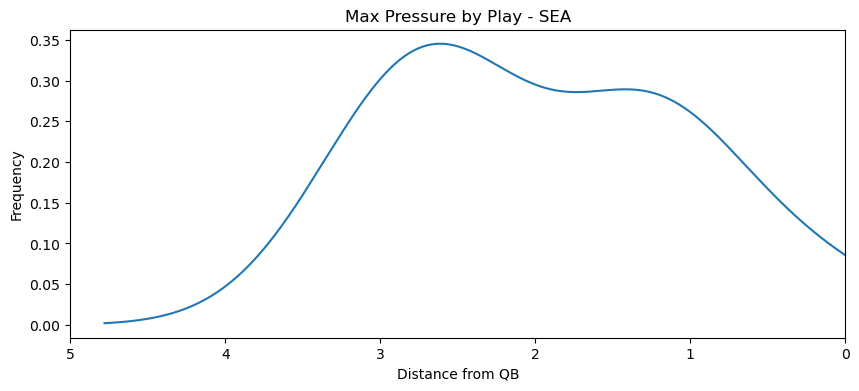

In [37]:
generate_plot('SEA')